In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline

In [2]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (15, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True

for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [3]:
import datetime
from astropy.time import Time
from astropy.table import Table

In [4]:
csv_data = Table.read('../data/spot_sensor_data.csv')

In [5]:
# get rid of all data with nan field2 val 
csv_data.remove_rows( np.where(csv_data['field2'].mask == True)[0] )

In [6]:
csv_data

created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status
str23,int64,float64,str12,float64,int64,int64,int64,int64
2016-10-07 22:28:15 MST,1,79.9,32.0,--,--,--,--,--
2016-10-07 22:46:45 MST,2,79.9,32.0,--,--,--,--,--
2016-11-24 12:48:11 MST,378,79.9,32.0,--,--,--,--,--
2017-03-12 09:26:37 MST,2109,--,26.25.2500,--,--,--,--,--
2017-03-12 09:26:52 MST,2110,--,26.25.2500,--,--,--,--,--
2017-03-12 09:27:07 MST,2111,--,26.1875.1875,--,--,--,--,--
2017-03-12 09:27:22 MST,2112,--,26.1875.1875,--,--,--,--,--
2017-03-12 09:27:37 MST,2113,--,27.3125.3125,--,--,--,--,--
2017-03-12 09:27:52 MST,2114,--,27.0625.0625,--,--,--,--,--


In [7]:
# add time
csv_data['timestamp'] = [x[:-4] for x in csv_data['created_at']]
csv_data['timestamp'] = Time(csv_data['timestamp'])
csv_data['timestamp'] = csv_data['timestamp'].mjd

In [8]:
csv_data

created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status,timestamp
str23,int64,float64,str12,float64,int64,int64,int64,int64,float64
2016-10-07 22:28:15 MST,1,79.9,32.0,--,--,--,--,--,57668.93628472222
2016-10-07 22:46:45 MST,2,79.9,32.0,--,--,--,--,--,57668.94913194444
2016-11-24 12:48:11 MST,378,79.9,32.0,--,--,--,--,--,57716.53346064815
2017-03-12 09:26:37 MST,2109,--,26.25.2500,--,--,--,--,--,57824.393483796295
2017-03-12 09:26:52 MST,2110,--,26.25.2500,--,--,--,--,--,57824.39365740741
2017-03-12 09:27:07 MST,2111,--,26.1875.1875,--,--,--,--,--,57824.39383101852
2017-03-12 09:27:22 MST,2112,--,26.1875.1875,--,--,--,--,--,57824.39400462963
2017-03-12 09:27:37 MST,2113,--,27.3125.3125,--,--,--,--,--,57824.39417824074
2017-03-12 09:27:52 MST,2114,--,27.0625.0625,--,--,--,--,--,57824.39435185185


In [9]:
# field2 values is str. remove weird data
start = 425
list(csv_data['field2'][start:start+10])

['27.062500',
 '26.56',
 '26.50',
 '26.44',
 '26.31',
 '26.25',
 '26.13',
 '26.06',
 '26.06',
 '26.00']

In [10]:
csv_data.remove_rows( range(0, 426) )
csv_data

created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status,timestamp
str23,int64,float64,str12,float64,int64,int64,int64,int64,float64
2017-03-12 19:58:26 MST,2536,--,26.56,--,--,--,--,--,57824.83224537037
2017-03-12 19:59:27 MST,2537,--,26.50,--,--,--,--,--,57824.83295138889
2017-03-12 20:00:27 MST,2538,--,26.44,--,--,--,--,--,57824.833645833336
2017-03-12 20:01:28 MST,2539,--,26.31,--,--,--,--,--,57824.83435185185
2017-03-12 20:02:27 MST,2540,--,26.25,--,--,--,--,--,57824.83503472222
2017-03-12 20:03:29 MST,2541,--,26.13,--,--,--,--,--,57824.835752314815
2017-03-12 20:04:26 MST,2542,--,26.06,--,--,--,--,--,57824.83641203704
2017-03-12 20:05:26 MST,2543,--,26.06,--,--,--,--,--,57824.83710648148
2017-03-12 20:06:26 MST,2544,--,26.00,--,--,--,--,--,57824.837800925925


In [11]:
# convert of pandas for ease
data = pd.DataFrame({'timestamp': csv_data['timestamp'], 'field2': csv_data['field2']})
data['field2'] = data['field2'].astype('float')
data

,timestamp,field2
0,57824.832245,26.56
1,57824.832951,26.50
2,57824.833646,26.44
3,57824.834352,26.31
4,57824.835035,26.25
5,57824.835752,26.13
6,57824.836412,26.06
7,57824.837106,26.06
8,57824.837801,26.00
9,57824.838495,25.94


Text(0, 0.5, 'temp (C)')

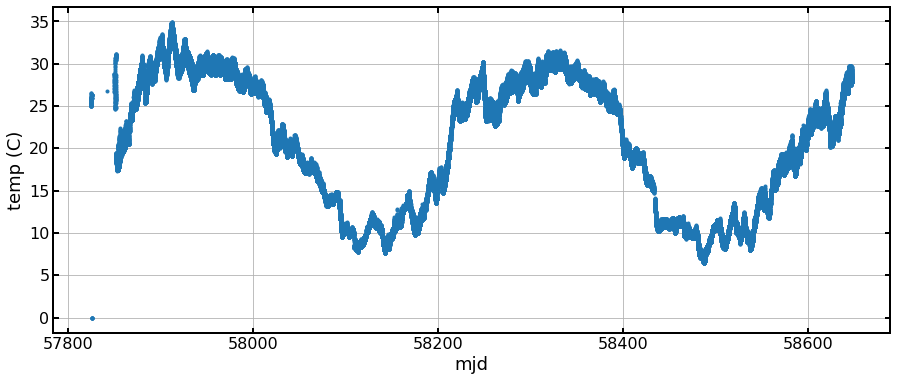

In [12]:
plt.plot(data['timestamp'], data['field2'], '.')
plt.xlabel('mjd')
plt.ylabel('temp (C)')